## 1. Treinamento o algoritmo de Regressão Logística

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection as ms
from sklearn import metrics as mt
# Gerando um conjunto de dados de classificação aleatório
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)
# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=42)
# Instanciando o modelo de Regressão Logística
model = LogisticRegression()
# Treinando o modelo de Regressão Logística
model.fit(X_train, y_train)
# predict
yhat_test = model.predict( X_test )
f1 = mt.f1_score( y_test, yhat_test )
## Calculando a acurácia do modelo nos dados de teste
print('F1-Score: {:.2f}'.format( f1 ) )

F1-Score: 1.00


## 2. Decision Boundaries

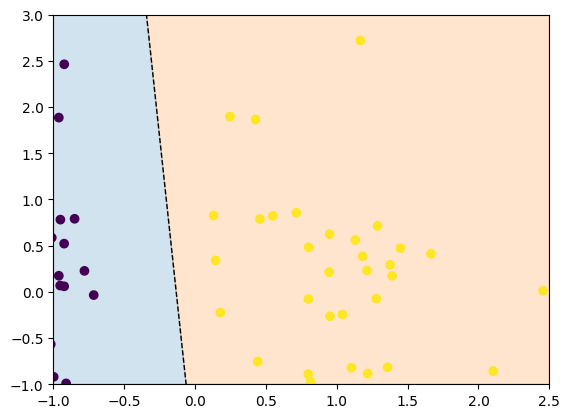

In [2]:
# Retrieve the model parameters.
b = model.intercept_[0]
w1, w2 = model.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2
# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 2.5
ymin, ymax = -1, 3.0
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.scatter( X_train[:,0], X_train[:,1], c=y_train )
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

##  3. Decision boundaries com probabilidade

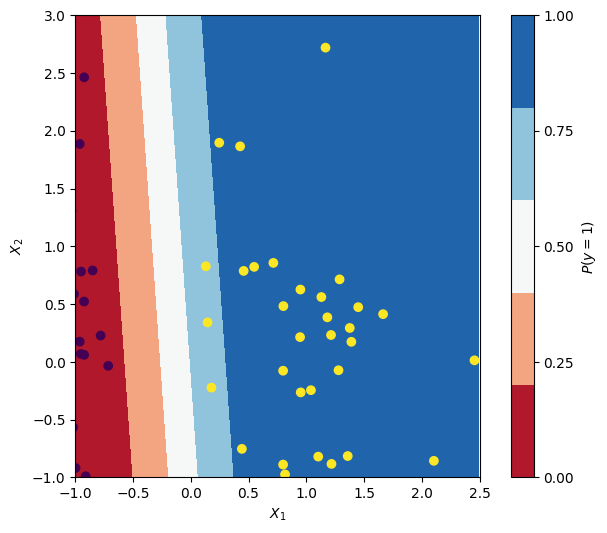

In [3]:
# desenhar um grid
xx, yy = np.mgrid[-1:2.5:.01, -1:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
# calcular as probabilidades
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
# Desenhar os contornos
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 5, cmap="RdBu", vmin=0, vmax=1)
# Barra de probabilidade
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter( X_train[:,0], X_train[:,1], c=y_train )
ax.set(aspect="equal",
xlim=(-1, 2.5), ylim=(-1, 3),
xlabel="$X_1$", ylabel="$X_2$");

# 1. Regularização na prática

In [4]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn import datasets as dt

In [5]:
# =========== Loading dataset ===========
n_samples = 1000
n_outliers = 50
X, y, coef = dt.make_regression(n_samples=n_samples, 
                                n_features=1,
                                n_informative=1,
                                noise=10,
                                coef=True,
                                random_state=0, 
                                )

[54.17236387]
[0.]
[47.40101138]


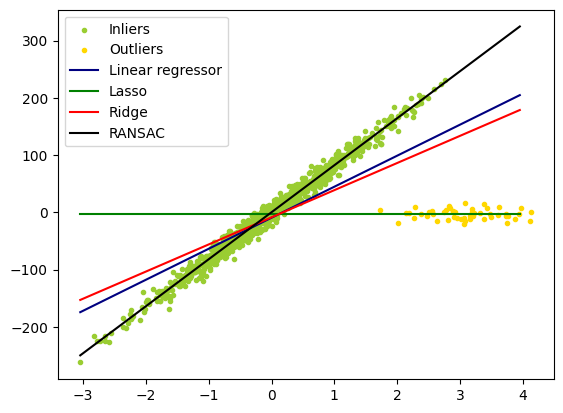

In [7]:

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)
# =========== Modeling ===========
# Linear Model
lr = lm.LinearRegression()
lr.fit(X, y)
# Lasso
lasso = lm.Lasso( alpha=200 )
lasso.fit(X, y)
# Ridge
ridge = lm.Ridge( alpha=200 )
ridge.fit(X, y)
# RANSAC
ransac = lm.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
# =========== Predict ===========
X_plot = np.arange(X.min(), X.max())[:, np.newaxis]
#X_plot = X
y_linear_model = lr.predict( X_plot )
y_lasso = lasso.predict( X_plot )
y_ridge = ridge.predict( X_plot )
y_ransac = ransac.predict( X_plot )
# =========== Coeficients ===========
print( lr.coef_ )
print( lasso.coef_ )
print( ridge.coef_ )
# =========== Plots ===========
plt.scatter( X[inlier_mask],
y[inlier_mask], color="yellowgreen", marker=".", label="Inliers" )
plt.scatter( X[outlier_mask],
y[outlier_mask], color="gold", marker=".", label="Outliers" )
plt.plot( X_plot, y_linear_model, color="navy", label="Linear regressor");
plt.plot( X_plot, y_lasso, color="green", label="Lasso");
plt.plot( X_plot, y_ridge, color="red", label="Ridge");
plt.plot( X_plot, y_ransac, color="black", label="RANSAC");
plt.legend();

## AULA 58 - Regressão Polinomial - Prática 

## 1. Treinamento o algoritmo de Regressão Polinomial


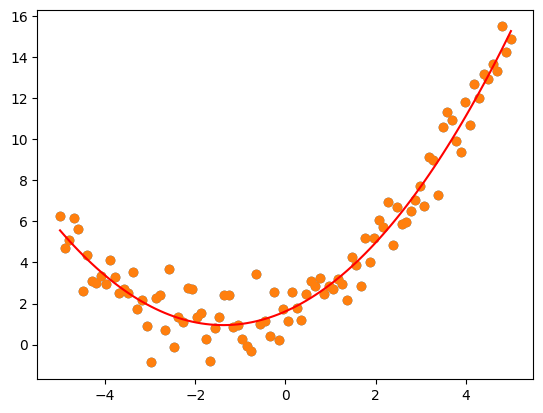

In [2]:
# Imports
import numpy as np
#import plotly.graph_objs as go
from matplotlib import pyplot as plt
from sklearn import preprocessing as pp
from sklearn import linear_model as lm
# Dataset
np.random.seed(0)
m = 100
X = np.linspace(-5, 5, num=m)
y = 0.3*X**2 + X + 2 + np.random.normal(size=m)
plt.scatter( X, y )
# Model Training
# Incluir termos polinomiais de grau 2
poly = pp.PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform( X.reshape(-1, 1) )
# model training
model = lm.LinearRegression()
model.fit( X_poly, y )
# predict
yhat = model.predict( X_poly )
# plot
plt.scatter( X, y )
plt.plot( X, yhat, color='red' )

## 2. Polinômios de maior grau

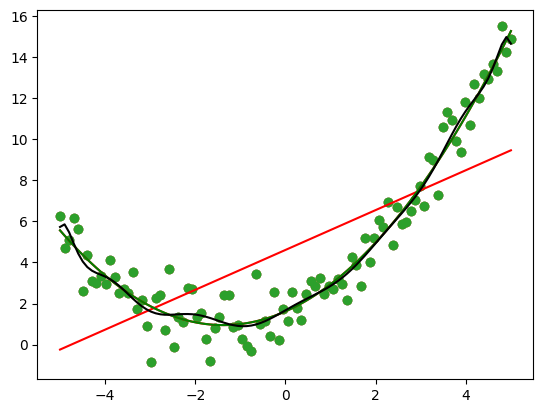

In [7]:
# Imports
import numpy as np
#import plotly.graph_objs as go
from matplotlib import pyplot as plt
from sklearn import preprocessing as pp
from sklearn import linear_model as lm
# Dataset
np.random.seed(0)
m = 100
X = np.linspace(-5, 5, num=m)
y = 0.3*X**2 + X + 2 + np.random.normal(size=m)
plt.scatter( X, y )
# Model Training
# Incluir termos polinomiais de grau 2
poly = pp.PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform( X.reshape(-1, 1) )
# model training
model = lm.LinearRegression()
model.fit( X_poly, y )
# predict
yhat = model.predict( X_poly )
# plot
plt.scatter( X, y )
plt.plot( X, yhat, color='red' )
# Graus do polinômio
degrees = [1, 2, 15]
coefs = []
intercepts = []
preds = []
for i in degrees:
    # features
    poly_features = pp.PolynomialFeatures( degree=i, include_bias=False )
    X_poly = poly_features.fit_transform( X.reshape( -1, 1 ) )
    # model training
    model = lm.LinearRegression()
    model.fit( X_poly, y )
    # model predict
    yhat = model.predict( X_poly )
    preds.append( yhat )
# Visualização dos gráficos
plt.scatter( X, y )
plt.plot( X, preds[0], color='red' )
plt.plot( X, preds[1], color='green' )
plt.plot( X, preds[2], color='black' )

## 3. Decision boundaries

In [9]:
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Gerando os dados do polinômio
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 2) * 10 # Duas variáveis exploratórias entre 0 e 10
coef = np.array([4, -3, 2]) # Coeficientes do polinômio verdadeiro: 2*X₁² - 3*X₂ + 4

In [11]:
y_true = np.dot(np.column_stack([X[:, 0]**2, X[:, 1], np.ones(n_samples)]), coef)
y_noise = np.random.normal(0, 2, n_samples) # Adicionando ruído aos dados
y = y_true + y_noise
# Criando a matriz de features polinomiais
poly = PolynomialFeatures(degree=8, include_bias=True)
X_poly = poly.fit_transform(X)
# Treinando o modelo de regressão polinomial
model = LinearRegression()
model.fit(X_poly, y)

# Gerando pontos na malha para plotar a superfície de decisão
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
np.arange(x2_min, x2_max, 0.1))
X_mesh = np.column_stack([x1_mesh.ravel(), x2_mesh.ravel()])
X_mesh_poly = poly.transform(X_mesh)
y_mesh = model.predict(X_mesh_poly)
y_mesh = y_mesh.reshape(x1_mesh.shape)
# Criando o gráfico 3D
fig = go.Figure(data=[
go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode='markers', marker=dict(color='blue', opacity=0.6), name='Dados'),
go.Surface(x=x1_mesh, y=x2_mesh, z=y_mesh, colorscale='amp', opacity=0.6, name='Superfície de Decisão')
])



# Configurando o layout do gráfico
fig.update_layout(scene=dict(
xaxis_title='X1',
yaxis_title='X2',
zaxis_title='Y',
aspectmode='auto'
))
# Exibindo o gráfico
fig.show()
